# Examen de certificación - Intento 3
Descripción
Instrucciones para examen

Objetivo: Este examen tiene como objetivo evaluar la capacidad del estudiante para limpiar, explorar, implementar y evaluar modelos de clasificación en un dataset de diabetes. Utilizaremos el «Diabetes Dataset» disponible en Kaggle. Los estudiantes deben demostrar habilidades prácticas en la manipulación de datos, creación de visualizaciones y modelado predictivo.

Contexto y Descripción del Dataset

El «Diabetes Dataset» contiene datos de salud de mujeres de ascendencia indígena Pima que viven cerca de Phoenix, Arizona, EE.UU. La tarea es predecir si un paciente tiene diabetes o no, basándose en ciertas medidas diagnósticas incluidas en el dataset.

Diccionario de Datos:

1. Pregnancies: Número de embarazos.
2. Glucose: Concentración de glucosa en plasma a las 2 horas en una prueba oral de tolerancia a la glucosa.
3. BloodPressure: Presión arterial diastólica (mm Hg).
4. SkinThickness: Espesor del pliegue cutáneo del tríceps (mm).
5. Insulin: Niveles séricos de insulina a las 2 horas (mu U/ml).
6. BMI: Índice de masa corporal (peso en kg / (altura en m)^2).
7. DiabetesPedigreeFunction: Función de pedigrí de diabetes.
8. Age: Edad (años).
9. Outcome: Variable objetivo (1: diabetes, 0: no diabetes).

Requisitos

1. Limpieza de Datos:
- Identificación y eliminación de valores duplicados: Asegúrate de que no haya registros duplicados que puedan sesgar los resultados del análisis.
- Verificación y ajuste de tipos de datos: Verifica que cada columna tenga el tipo de dato correcto (numérico o categórico) y ajusta si es necesario.
- Corrección de inconsistencias en valores categóricos: Revisa las categorías de las variables y unifica aquellos valores que puedan estar escritos de diferentes maneras pero que representen lo mismo.
- Manejo de valores faltantes adecuadamente: Identifica y maneja los valores faltantes utilizando técnicas apropiadas como la imputación de la mediana, media o moda, según corresponda.

2. Exploración de Datos:
- Visualizaciones univariadas y multivariadas: Crea histogramas, gráficos de barras, diagramas de dispersión y mapas de calor para entender la distribución y las relaciones entre las variables.
- Estadísticas descriptivas: Calcula medidas de tendencia central (media, mediana, moda) y de dispersión (rango, desviación estándar) para cada característica del dataset.

3. Implementación de Modelos:
- Modelos de Clasificación: Implementa modelos de Random Forest y XGBoost.
- Evaluación de Modelos: Evalúa los modelos utilizando métricas como accuracy, precision, recall, F1-score, y ROC-AUC.
- Comparación de Rendimiento: Compara los resultados de ambos modelos y discute cuál es el más adecuado para este dataset.

Entrega

Los estudiantes deben entregar un archivo .ipynb comentado que incluya:

- Proceso completo de limpieza y preprocesamiento de datos.
- Visualizaciones y estadísticas descriptivas.
- Implementación y evaluación de los modelos de clasificación.
- Análisis comparativo del rendimiento de los modelos.

Además, el archivo debe subirse a GitHub con un tag de liberación (release tag) que permita identificar la entrega final.

Consideraciones Éticas y Tecnológicas

Consideraciones Éticas:

- Transparencia y Reproducibilidad: Asegúrate de que todos los pasos del análisis sean claros y reproducibles. Otros investigadores deben poder seguir tus pasos y llegar a los mismos resultados.
- Imparcialidad y Sesgo: Revisa si existen sesgos en los datos que puedan afectar la imparcialidad del modelo. Es importante que los modelos no discriminen injustamente entre diferentes grupos de datos.

Consideraciones Tecnológicas:

- Herramientas Utilizadas: Utiliza herramientas estándar como Python, Jupyter Notebook, Pandas, Scikit-learn, Matplotlib y Seaborn.
- Escalabilidad: Considera cómo las técnicas aplicadas podrían escalarse para manejar conjuntos de datos más grandes y complejos.
- Optimización de Modelos: Aunque este examen no se enfoca en la optimización de hiperparámetros, se debe tener en cuenta para futuras implementaciones y mejorar el rendimiento de los modelos.

# 1. Limpieza de Datos

In [15]:
#Cargo el dataset
import pandas as pd

df = pd.read_csv('/Users/mathiorti/Desktop/Me/Cursos/Data Analisis and Machine Learning/Data Sets/diabetes.csv')
print(df.head()) #Esto lo hago para verificar si se cargó correctamente

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [16]:
#La carga está correcta. Verifico que no haya valores duplicados
print(df.duplicated().sum())

0


In [17]:
#No tengo valores duplicados. Voy ahora con los tipos de datos
print(df.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [18]:
#Los tipos de datos son correctos. 
#No hace falta que vea la inconsistencia porque todos son numéricos.
#Veo si tenemos datos nulos
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [19]:
#Por lo que puedo observar no tengo datos nulos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [20]:
#768 entradas... 768 datos no nulos

# 2. Exploración de Datos

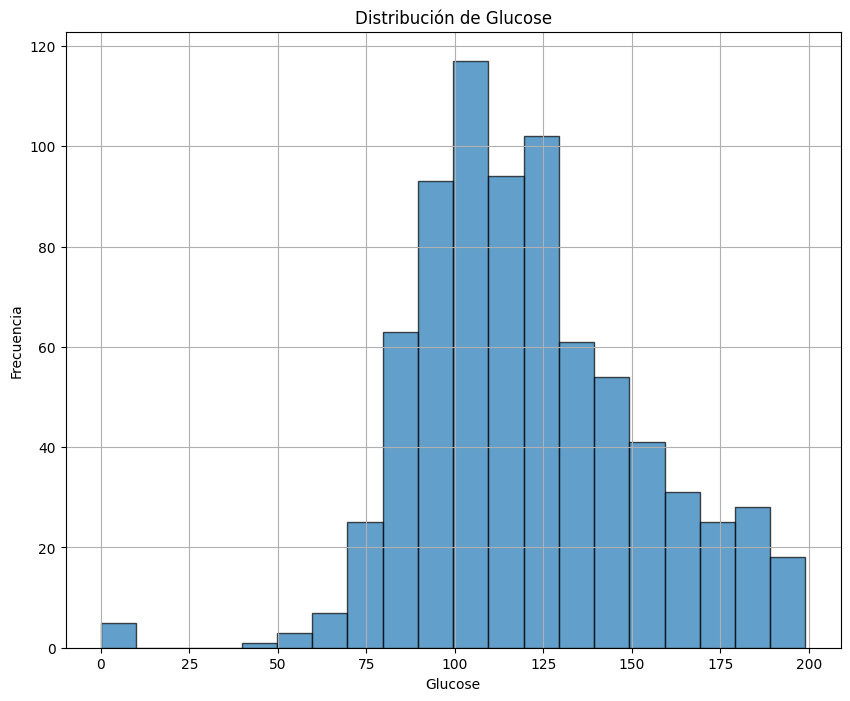

In [21]:
# Hago visualizaciones para entender la distribución de los datos
import matplotlib.pyplot as plt

#Empezaré con algunos gráficos para entender mejor
plt.figure(figsize=(10, 8))
plt.hist(df['Glucose'], bins = 20, edgecolor = 'black', alpha = 0.7)
plt.title('Distribución de Glucose')
plt.xlabel('Glucose')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [22]:
#La mayoría de los datos están concentrados entre 80 y 150, estos son los niveles más comunes en el dataset 
#Hay muy pocos casos con niveles muy bajos, pueden ser outliers.
import plotly.express as px

fig = px.box(df, y = 'BloodPressure', title='Distribución de BloodPressure')
fig.show()

In [23]:
#El mínimo de 0 muy probablemente se refiera a un dato faltante. Porque una persona no puede tener
#bloodPressure de 0. Tenemos valores fuera de los límites que pueden ser considerados atípicos.
#Como los que son más de 106 y menos de 38.
#Elimino el valor de 0 para bloodPressure
df = df[df['BloodPressure'] >= 24]
#Ahora compruebo nuevamente
fig = px.box(df, y = 'BloodPressure', title='Distribución de BloodPressure')
fig.show()

In [24]:
#Se eliminó el dato atípico
#Haré con lo mismo con glucosa
fig = px.box(df, y = 'Glucose', title='Distribución de Glucose')
fig.show()

In [25]:
#No puede haber un nivel de glucosa de 0. Elimino el dato atípico
df = df[df['Glucose'] >= 44]
#Compruebo nuevamente
fig = px.box(df, y = 'Glucose', title='Distribución de Glucose')
fig.show()

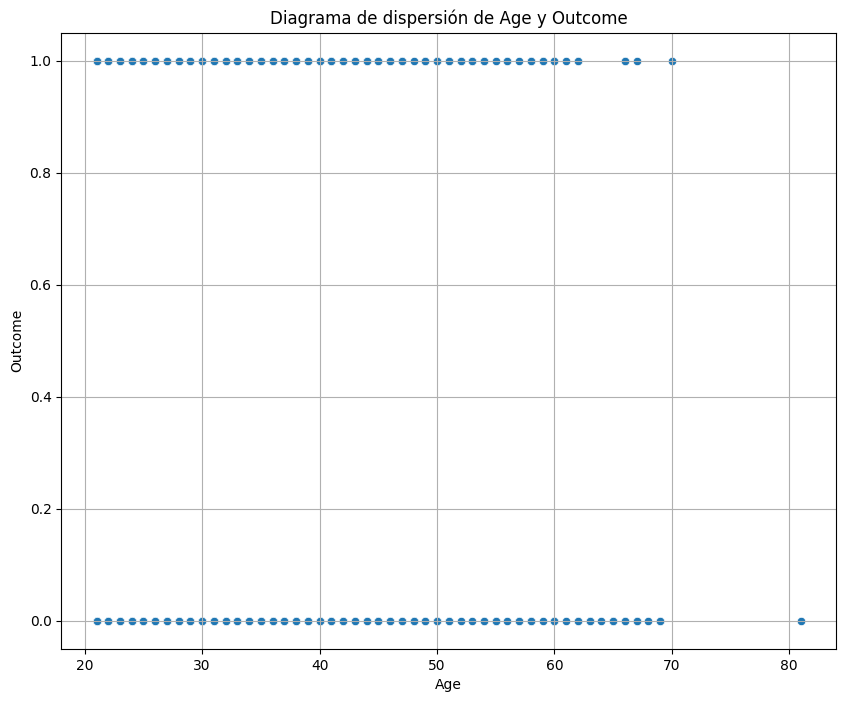

In [28]:
#Ahora ya está tratado el outlier
import seaborn as sns
#Haré un diagreama de dispersión
plt.figure(figsize=(10, 8))
sns.scatterplot(x = 'Age', y = 'Outcome', data = df)
plt.title('Diagrama de dispersión de Age y Outcome')
plt.xlabel('Age')
plt.ylabel('Outcome')
plt.grid(True)
plt.show()

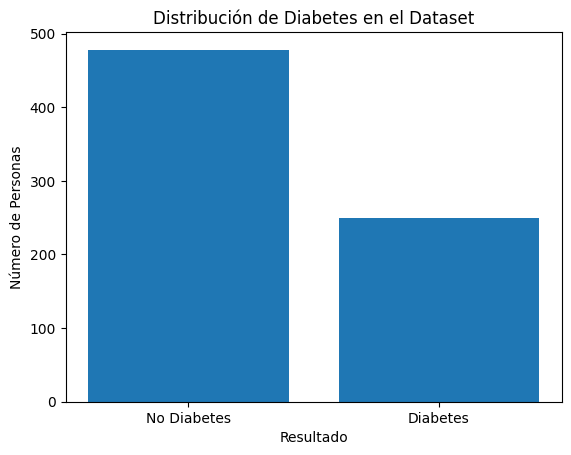

In [29]:
#Con esto veo la relación entre la edad y si tiene o no diabetes
#Puedo ver a simple vista que las personas con diabetes están distribuidas en diferentes edades.
#No puedo decir que si se tiene diabetes es porque tiene más edad.
#Hago un gráfico de barras

outcome_counts = df['Outcome'].value_counts() #Cuento la cantidad de veces de cada valor único

plt.bar(['No Diabetes', 'Diabetes'], outcome_counts)
plt.xlabel('Resultado')
plt.ylabel('Número de Personas')
plt.title('Distribución de Diabetes en el Dataset')
plt.show()

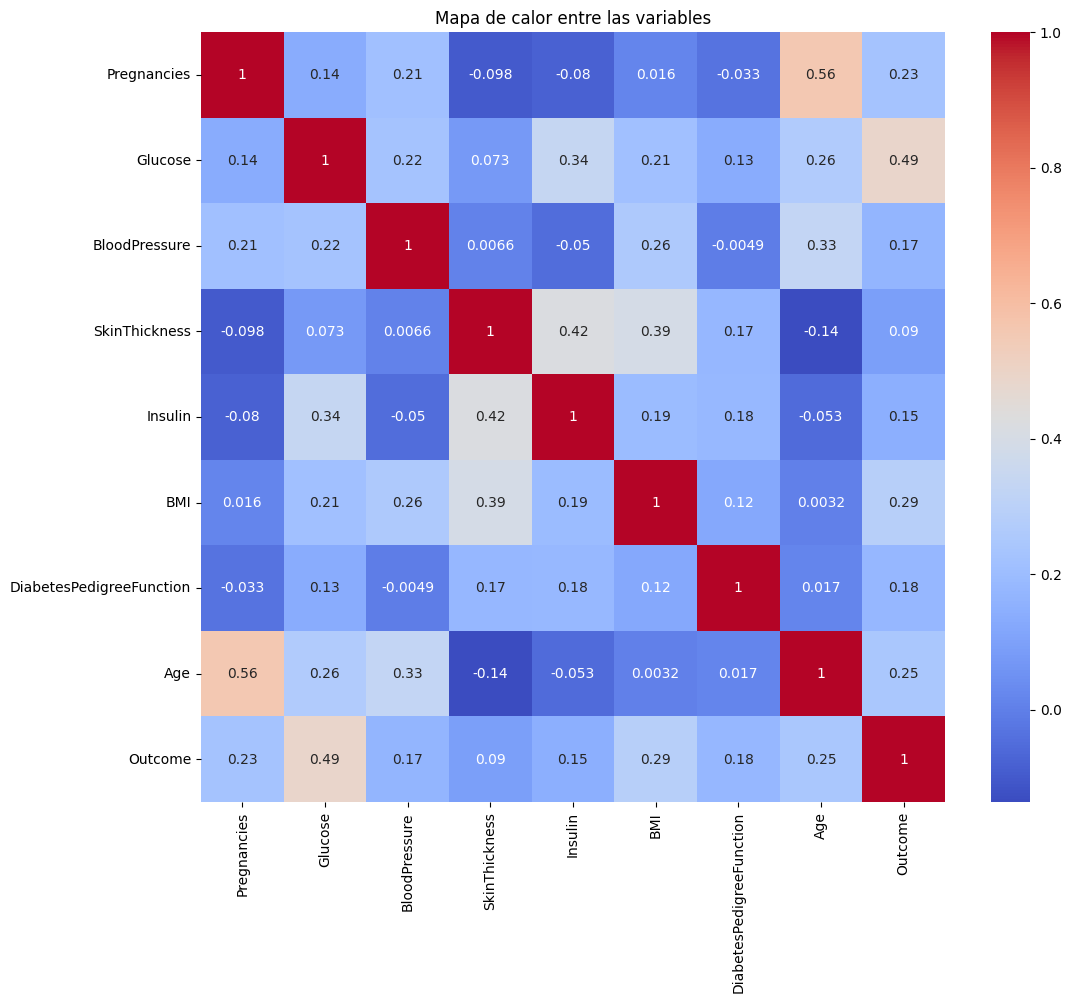

In [31]:
#Veo que hay más personas que no tienen diabetes
#Hay un desequilibrio por ese motivo. Debo tener cuidado porque puede sesgar mis resultados.
plt.figure(figsize=(12, 10)) #Esta teoría lo saco del Bootcamp
df_numeric = df.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot= True, cmap='coolwarm')
plt.title('Mapa de calor entre las variables')
plt.show()

In [34]:
# Lo que veo es una relacion entre Pregnancies y Age de 56%. Quiere decir que las personas mayores
#tienen más embarazo.
# Glucosa e Insulina tienen una relación moderada de 34%
#Con outcome que es mi resultado tengo la glucosa 49% que me indica que un mayor nivel de glucosa está
#relacionado con una mayor probabilidad de diabetes y tiene sentido.
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   728.000000  728.000000     728.000000     728.000000  728.000000   
mean      3.862637  121.873626      72.438187      21.388736   84.152473   
std       3.363422   30.679207      12.386109      15.729793  116.819934   
min       0.000000   44.000000      24.000000       0.000000    0.000000   
25%       1.000000  100.000000      64.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      24.000000   48.000000   
75%       6.000000  141.250000      80.000000      33.000000  130.000000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  728.000000                728.000000  728.000000  728.000000  
mean    32.288736                  0.476518   33.394231    0.343407  
std      7.277660                  0.334851   11.849692    0.475172  
min      0.000000                  

# 3. Implementación de Modelos

In [35]:
#Haré el pipeline para el preprocesamiento. Y de esto uniré con la implementación de los modelos
#Vi esto en el bootcamp y me parece muy ordenado.
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

#Selecciono la variable objetivo y la separo
X = df.drop('Outcome', axis = 1) #Con esto selecciono todas las columnas, excepto Outcome
y = df['Outcome'] #Esta sería mi columna objetivo

#Ahora divido los conjuntos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Pipeline

num_columns = X.select_dtypes(include=['number']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_columns),
    ]
)

#Ahora hago el pipeline completo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

In [36]:
#Ahora hago los modelos predictivos
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
#Toda esta parte quitado de modelos de clasificacion del bootcamp

#Pipeline de los modelos
pipeline_RF = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, random_state=42))
])

pipeline_XGB = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(eval_metric='logloss', random_state=42))
])

#Entreno los modelos 
pipeline_RF.fit(X_train, y_train)
pipeline_XGB.fit(X_train, y_train)

#Hago las predicciones
y_pred_RF = pipeline_RF.predict(X_test)
y_pred_XGB = pipeline_XGB.predict(X_test)

#Una vez hecho todo esto, evalúo los modelos
print(f'Reporte del modelo Random Forest:')
print(classification_report(y_test, y_pred_RF))

print(f'Reporte del modelo XGBoost:')
print(classification_report(y_test, y_pred_XGB))

#También puedo comparar el accuracy de cada uno
accuracy_RF = accuracy_score(y_test, y_pred_RF)
accuracy_XGB = accuracy_score(y_test, y_pred_XGB)

Reporte del modelo Random Forest:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        95
           1       0.73      0.63      0.67        51

    accuracy                           0.79       146
   macro avg       0.77      0.75      0.76       146
weighted avg       0.78      0.79      0.78       146

Reporte del modelo XGBoost:
              precision    recall  f1-score   support

           0       0.79      0.82      0.80        95
           1       0.64      0.59      0.61        51

    accuracy                           0.74       146
   macro avg       0.71      0.70      0.71       146
weighted avg       0.74      0.74      0.74       146



In [39]:
#Por ahora el mejor modelo entre los dos es el Random Forest que tiene un accuracy de 79% contra 74%
#Ajustaré los hiperparámetros con GridSearch para ver si los puedo mejorar
from sklearn.model_selection import GridSearchCV
#Esta parte lo quito de 'boosting' del bootcamp

#Parametros
param_grid_RF = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__min_samples_split': [2, 5, 10]
}

param_grid_XGB = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [3, 6, 9],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.6, 0.8, 1.0]
}

#Hago el GridSearch para cada modelo
grid_RF = GridSearchCV(pipeline_RF, param_grid_RF, cv=5, scoring='accuracy')
grid_XGB = GridSearchCV(pipeline_XGB, param_grid_XGB, cv=5, scoring='accuracy')

#Ahora entreno los modelos
grid_RF.fit(X_train, y_train)
grid_XGB.fit(X_train, y_train)

#Ahora veo los mejores parametros
print("Mejores parámetros para Random Forest:", grid_RF.best_params_)
print("Mejor validación cruzada accuracy for Random Forest:", round(grid_RF.best_score_, 4))

print("Mejores parámetros para XGBoost:", grid_XGB.best_params_)
print("Mejor validación cruzada accuracy for XGBoost:", round(grid_XGB.best_score_, 4))

Mejores parámetros para Random Forest: {'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
Mejor validación cruzada accuracy for Random Forest: 0.7612
Mejores parámetros para XGBoost: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 6, 'classifier__n_estimators': 200, 'classifier__subsample': 0.6}
Mejor validación cruzada accuracy for XGBoost: 0.7525


In [40]:
#Una vez que tengo los mejores parámetros. Evalúo su desempeño
# Predicciones con el modelo ajustado
best_rf = grid_RF.best_estimator_
y_pred_RF_best = best_rf.predict(X_test)
print("Random Forest ajustado en prueba:")
print(classification_report(y_test, y_pred_RF_best))

best_xgb = grid_XGB.best_estimator_
y_pred_XGB_best = best_xgb.predict(X_test)
print("XGBoost ajustado en prueba:")
print(classification_report(y_test, y_pred_XGB_best))


Random Forest ajustado en prueba:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        95
           1       0.71      0.57      0.63        51

    accuracy                           0.77       146
   macro avg       0.75      0.72      0.73       146
weighted avg       0.76      0.77      0.76       146

XGBoost ajustado en prueba:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        95
           1       0.74      0.61      0.67        51

    accuracy                           0.79       146
   macro avg       0.77      0.75      0.76       146
weighted avg       0.78      0.79      0.78       146



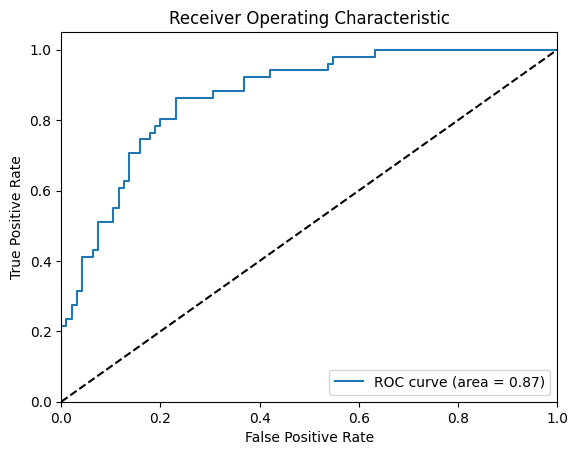

In [41]:
#Si veo Random Forest. El modelo ajustado tienen un rendimiento menor que el original. Esto quiere decir
#que los hiperparámtros iniciales ya eran los más adecuados.
#Viendo XGBoost el modelo mejoró en accuracy (79%).
#Esta teoría lo quito del bootcamp
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = grid_XGB.best_estimator_.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva
#Calculo la curva
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

#Calculo AUC
auc = roc_auc_score(y_test, y_pred_prob)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [42]:
#Lo que puedo observar es que la curva ROC está cerca del vértice izquierdo. O sea que el modelo tiene
#una buena capacidad para maximizar los verdaderos positivos.
#0.87 me indica que el modelo tiene 87% de probabilidades de clasificar un caso positivo como más 
#probable que un caso negativo.

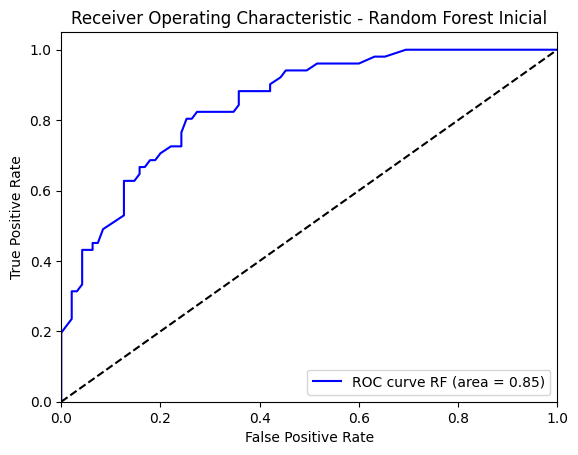

In [44]:
#Hago tambien para ver la curva del Random Forest pero el original que tiene mejor desempeño
# Modelo Random Forest inicial
y_pred_prob_RF = pipeline_RF.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva

#Curva ROC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_RF)

# Calculo AUC
auc_rf = roc_auc_score(y_test, y_pred_prob_RF)

# Grafico
plt.figure()
plt.plot(fpr_rf, tpr_rf, label='ROC curve RF (area = %0.2f)' % auc_rf, color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest Inicial')
plt.legend(loc="lower right")
plt.show()



In [ ]:
#Un AUC de 0.85 me dice que tiene 85% de probabilidad de clasificar un caso positico como más probable 
#que un caso negativo.
#Igual tener en cuenta que es menor que el de XGBoost ajustado.

# Conclusión

Al analizar los modelos de Random Forest y XGBoost obtuve lso resultados de:
- Random Forest Inicial:
    - Accuracy de 79%
    - AUC de 0.85
- Random Forest Ajustado:
    - Accuracy de 77%
- XGBoost Inicial:
    - Accuracy de 74%
- XGBoost Ajustado:
    - Accuracy de 79%
    - AUC de 0.87

Viendo esto puedo decir que el modelo ajustado de XGBoost es el más adecuado para el problema porque, tiene el AUC más alto de 0.87 y tiene un buen accuracy de 79%